In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
import math
import Model

if __name__ == "__main__":
	t0 = time.time()
	featureList = ['EPS Growth', 'Volatility 180 D', 'Trailing EPS', 'Price to Cash Flow', 'EPS', 'Volume', 'Return on Assets', 'Price to Book', 'Dividend Yield', 'Total Debt to Total Equity', 'Return on Invested Capital', 'Return on Common Equity']
	train, validate, test = Model.splitData(200,3,12)
	tree = Model.buildWithIndexesTripleClass(modelType = Model.randomForestClassifier, indexes = train, target= 'Rate of Return', features = featureList, featureLength = 12,\
									targetLength = 3, sector = "Financials", percentileTarget = 90, percentileAvoid = 10, verbose = True)
	print("Labels: ")
	print(tree.classes_)
	print("Importances: ")
	print(tree.feature_importances_)

[-144  -54 -132 -168 -102 -138  -99  -24 -129 -198 -180 -141 -159 -162  -72
 -165  -42 -192 -105  -84  -27 -195 -183 -126  -21 -156  -39 -108  -69 -111
  -96 -150 -147  -78  -45 -186  -51]
[ -36  -66 -171 -174 -117  -87  -33 -153 -114 -123  -90  -81]
[ -93 -189 -135  -60  -30  -57  -63 -177 -120  -48 -201  -75  -18]
Index: -144
0.0 percent complete with preparing data.


/Users/masontian/Documents/GitHub/Equity-Analysis/Model.py:168: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  values = data.loc[data.index[len(data) + startIndex:len(data) + endIndex + 1], features]


Index: -54
2.7027027027027026 percent complete with preparing data.
Index: -132
5.405405405405405 percent complete with preparing data.
Index: -168
8.108108108108109 percent complete with preparing data.
Index: -102
10.81081081081081 percent complete with preparing data.
Index: -138
13.513513513513514 percent complete with preparing data.
Index: -99
16.216216216216218 percent complete with preparing data.
Index: -24
18.91891891891892 percent complete with preparing data.
Index: -129
21.62162162162162 percent complete with preparing data.
Index: -198
24.324324324324326 percent complete with preparing data.
Index: -180
27.027027027027028 percent complete with preparing data.
Index: -141
29.72972972972973 percent complete with preparing data.
Index: -159
32.432432432432435 percent complete with preparing data.
Index: -162
35.13513513513514 percent complete with preparing data.
Index: -72
37.83783783783784 percent complete with preparing data.
Index: -165
40.54054054054054 percent complete

In [3]:
precisions = {'seen':{}, 'above10':{}, 'above75':{}, 'above50':{}, 'above25':{}, 'above90':{}}
betterThan = {}
for prob in range(0,100,5):
	precisions['seen'][prob] = 0
	precisions['above10'][prob] = 0
	precisions['above75'][prob] = 0
	precisions['above50'][prob] = 0
	precisions['above25'][prob] = 0
	precisions['above90'][prob] = 0
for i in validate:
	addedStocks, probabilities = Model.predict_probabilities(tree, startIndex = i, endIndex = i+11, features = featureList, sector = "Financials")
	actual = []
	for prob in range(0,100,5):
		betterThan[prob] = []
	for stock in addedStocks:
		actual.append(Model.rateOfReturn(Model.retrieveData(stock, 'Last Price', i+12, i+14, [])))
	for i in range(len(probabilities)):
		for prob in range(0,100,5):
			if probabilities[i][1] > prob / 100:
				betterThan[prob].append(1)
			else:
				betterThan[prob].append(0)
	for prob in range(0,100,5):
		if sum(betterThan[prob]) > 0:
			precisions['above10'][prob] = (Model.precision(Model.getPercentile(actual, 10),betterThan[prob]) * len(betterThan[prob]) + precisions['above10'][prob] * precisions['seen'][prob]) / (precisions['seen'][prob] + len(betterThan[prob]))
			precisions['above75'][prob] = (Model.precision(Model.getPercentile(actual, 75),betterThan[prob]) * len(betterThan[prob]) + precisions['above75'][prob] * precisions['seen'][prob]) / (precisions['seen'][prob] + len(betterThan[prob]))
			precisions['above50'][prob] = (Model.precision(Model.getPercentile(actual, 50), betterThan[prob]) * len(betterThan[prob]) + precisions['above50'][prob] * precisions['seen'][prob]) / (precisions['seen'][prob] + len(betterThan[prob]))
			precisions['above25'][prob] = (Model.precision(Model.getPercentile(actual, 25), betterThan[prob]) * len(betterThan[prob]) + precisions['above25'][prob] * precisions['seen'][prob]) / (precisions['seen'][prob] + len(betterThan[prob]))
			precisions['above90'][prob] = (Model.precision(Model.getPercentile(actual, 90), betterThan[prob]) * len(betterThan[prob]) + precisions['above90'][prob] * precisions['seen'][prob]) / (precisions['seen'][prob] + len(betterThan[prob]))
			precisions['seen'][prob] = precisions['seen'][prob] + len(betterThan[prob])
x = []
y90 = []
y75 = []
y50 = []
y25 = []
y10 = []
counts = []
for prob in range(0,100,5):
	print(str(prob) + " above 90th percentile: " + str(precisions['above90'][prob]))
	print(str(prob) + " above 75th percentile: " + str(precisions['above75'][prob]))
	print(str(prob) + " above 50th percentile: " + str(precisions['above50'][prob]))
	print(str(prob) + " above 25th percentile: " + str(precisions['above25'][prob]))
	print(str(prob) + " above 10th percentile: " + str(precisions['above10'][prob]))
	counts.append(sum(betterThan[prob]))
	if (precisions['above10'][prob]) > 0:
		y90.append(precisions['above90'][prob])
		y75.append(precisions['above75'][prob])
		y50.append(precisions['above50'][prob])
		y25.append(precisions['above25'][prob])
		y10.append(precisions['above10'][prob])
		x.append(prob)

print(time.time() - t0, "seconds wait time")

/Users/masontian/Documents/GitHub/Equity-Analysis/Model.py:168: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  values = data.loc[data.index[len(data) + startIndex:len(data) + endIndex + 1], features]


0 above 90th percentile: 0.0999787279302
0 above 75th percentile: 0.248245054244
0 above 50th percentile: 0.495639225697
0 above 25th percentile: 0.74303339715
0 above 10th percentile: 0.892150606254
5 above 90th percentile: 0.10660757358
5 above 75th percentile: 0.255053372715
5 above 50th percentile: 0.49778883503
5 above 25th percentile: 0.740015663226
5 above 10th percentile: 0.888991491513
10 above 90th percentile: 0.122907962446
10 above 75th percentile: 0.276994900531
10 above 50th percentile: 0.509579968085
10 above 25th percentile: 0.740779353614
10 above 10th percentile: 0.883972609281
15 above 90th percentile: 0.146881294627
15 above 75th percentile: 0.296810402614
15 above 50th percentile: 0.520006315339
15 above 25th percentile: 0.735858862478
15 above 10th percentile: 0.876554729075
20 above 90th percentile: 0.164739775996
20 above 75th percentile: 0.316082752379
20 above 50th percentile: 0.517920401593
20 above 25th percentile: 0.735238450999
20 above 10th percentile: 0.

Counts: 
[436, 403, 281, 191, 136, 108, 90, 75, 64, 56, 48, 44, 34, 24, 18, 14, 9, 6, 2, 0]


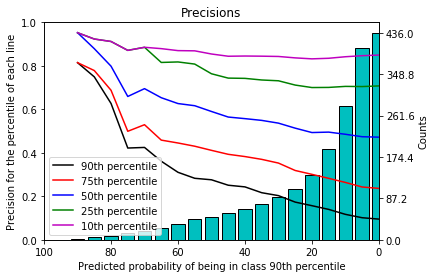

In [4]:
print("Counts: ")
print(counts)
fig = plt.figure()
axes = plt.gca()
axes.set_xlim([0,100])
axes.set_xlim([0,100])
plt.title("Precisions")
plt.xlabel('Predicted probability of being in class 90th percentile')
plt.ylabel('Precision for the percentile of each line')
axes.invert_xaxis()
bar = axes.twinx()
rects = bar.bar(x = list(range(0,100,5)), height = list(map(lambda x: x/max(counts),counts)), width = 4, color = 'c', linestyle = 'solid', edgecolor = 'k', zorder = -1)
bar.set_yticklabels(list(map(lambda x: x * max(counts) / 5, range(0,6,1))))
bar.set_ylabel('Counts', color = 'k')
plt.plot(x, y90, color = 'k', label = "90th percentile")
plt.plot(x, y75, color = 'r', label = "75th percentile")
plt.plot(x, y50, color = 'b', label = "50th percentile")
plt.plot(x, y25, color = 'g', label = "25th percentile")
plt.plot(x, y10, color = 'm', label = "10th percentile")
plt.legend()

In [ ]:
fig.savefig(str(time.time()) + 'test.jpg')
plt.show()